In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [13]:
df=pd.read_csv('Carbon Emission.csv')

In [14]:
df.corr()

/var/folders/kk/3csz3h6n39j4h1xsf3h235wr0000gn/T/ipykernel_93940/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Monthly Grocery Bill,Vehicle Monthly Distance Km,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,CarbonEmission
Monthly Grocery Bill,1.000000,0.015801,0.002343,-0.010318,0.006746,0.012798,0.081587
Vehicle Monthly Distance Km,0.015801,1.000000,-0.001730,-0.003943,0.004934,-0.003497,0.594171
Waste Bag Weekly Count,0.002343,-0.001730,1.000000,-0.011640,-0.003254,-0.005335,0.159193
How Long TV PC Daily Hour,-0.010318,-0.003943,-0.011640,1.000000,0.009414,0.006804,0.012985
How Many New Clothes Monthly,0.006746,0.004934,-0.003254,0.009414,1.000000,0.006426,0.198887
How Long Internet Daily Hour,0.012798,-0.003497,-0.005335,0.006804,0.006426,1.000000,0.043878
CarbonEmission,0.081587,0.594171,0.159193,0.012985,0.198887,0.043878,1.000000


In [15]:
df.shape

(10000, 20)

In [16]:
# code for ordinal encoding 

import pandas as pd

def ordinal_encode_df(df, order=None):
    mapping = {}
    encoded_df = pd.DataFrame()
    
    for col in df.columns:
        if order and col in order:
            unique_categories = order[col]
        else:
            unique_categories = sorted(df[col].unique())  # Get unique categories and sort them
            
        category_mapping = {category: idx for idx, category in enumerate(unique_categories)}
        mapping[col] = category_mapping
        encoded_df[col] = df[col].map(category_mapping)
    
    return encoded_df, mapping

# Sample DataFrame
# data = {
#     'animal': ['cat', 'dog', 'elephant', 'dog'],
#     'size': ['larger', 'medium', 'large', 'small']
# }
# df = pd.DataFrame(data)

# # Define the orders for each column
# orders = {
#     'animal': ['elephant', 'cat', 'dog'],  # Specific order for 'animal'
#     'size': ['larger', 'large', 'medium', 'small']  # Specific order for 'size'
# }

# # Perform ordinal encoding with the specified orders
# encoded_df, mapping = ordinal_encode_df(df, order=orders)

# # Print the encoded DataFrame and mapping
# print("Encoded DataFrame:")
# print(encoded_df)

# print("\nMapping:")
# for col, category_mapping in mapping.items():
#     print(f"{col}: {category_mapping}")


In [17]:
def count_elements(string):
    # Remove the brackets and split the string by commas
    elements = string.strip("[]").split(", ")
    # Count the number of elements
    return len(elements)

In [22]:
# as we saw that no major difference in seeing for different recycling things we see how many things the [person recycle

df['Cook_count'] = df['Cooking_With'].apply(count_elements)
df.drop('Cooking_With', axis=1, inplace=True)

# region_cost= df.groupby('Cook_count')['CarbonEmission'].mean() 
# fig = plt.figure(figsize=(8,4))
# sns.barplot(x=region_cost.index, y=region_cost.values, color=colors_nude[-1])
# plt.title('Cook_count'+' Vs Carbon Emission' ,size = 15)
# plt.ylabel('Carbon Emission')
# plt.show()

In [23]:
# as we saw that no major difference in seeing for different recycling things we see how many things the [person recycle

df['Recycling_count'] = df['Recycling'].apply(count_elements)
df.drop('Recycling', axis=1, inplace=True)

# region_cost= df.groupby('Recycling_count')['CarbonEmission'].mean() 
# fig = plt.figure(figsize=(8,4))
# sns.barplot(x=region_cost.index, y=region_cost.values, color=colors_nude[-1])
# plt.title('Recycling_count'+' Vs Carbon Emission' ,size = 15)
# plt.ylabel('Carbon Emission')
# plt.show()

In [69]:
# Recycling = set()
# for row in df['Recycling']:
#     names = row.strip('[]').split(',')
#     Recycling.update([name.strip() for name in names])

# print("Unique names:", Recycling)

Unique names: {'', "'Plastic'", "'Metal'", "'Paper'", "'Glass'"}


In [70]:
# unique_names = ['Microwave','Airfryer','Oven','Stove','Grill']

# for name in unique_names:
#     df[name] = df['Cooking_With'].str.contains(name).astype(int)

# df.drop('Cooking_With', axis=1, inplace=True)

In [71]:
# unique_names = ['Plastic','Paper','Metal','Glass']

# for name in unique_names:
#     df[name] = df['Recycling'].str.contains(name).astype(int)

# df.drop('Recycling', axis=1, inplace=True)

In [24]:
df.head()

# we can remove cook_count as we saw no major difference

,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Vehicle Type,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,Energy efficiency,CarbonEmission,Cook_count,Recycling_count
0,overweight,female,pescatarian,daily,coal,public,NaN,often,230,frequently,210,large,4,7,26,1,No,2238,2,1
1,obese,female,vegetarian,less frequently,natural gas,walk/bicycle,NaN,often,114,rarely,9,extra large,3,9,38,5,No,1892,2,1
2,overweight,male,omnivore,more frequently,wood,private,petrol,never,138,never,2472,small,1,14,47,6,Sometimes,2595,2,1
3,overweight,male,omnivore,twice a day,wood,walk/bicycle,NaN,sometimes,157,rarely,74,medium,3,20,5,7,Sometimes,1074,3,4
4,obese,female,vegetarian,daily,coal,private,diesel,often,266,very frequently,8457,large,1,3,5,6,Yes,4743,1,1


In [25]:
df.isna().sum()

Body Type                           0
Sex                                 0
Diet                                0
How Often Shower                    0
Heating Energy Source               0
Transport                           0
Vehicle Type                     6721
Social Activity                     0
Monthly Grocery Bill                0
Frequency of Traveling by Air       0
Vehicle Monthly Distance Km         0
Waste Bag Size                      0
Waste Bag Weekly Count              0
How Long TV PC Daily Hour           0
How Many New Clothes Monthly        0
How Long Internet Daily Hour        0
Energy efficiency                   0
CarbonEmission                      0
Cook_count                          0
Recycling_count                     0
dtype: int64

In [26]:
df['Vehicle Type']=df['Vehicle Type'].fillna('no_vehicle')

In [27]:
df.shape

(10000, 20)

In [76]:
columns_to_encode = ['Body Type', 'Sex', 'Diet', 'How Often Shower', 'Heating Energy Source',
       'Transport', 'Vehicle Type', 'Social Activity',
       'Frequency of Traveling by Air',
       'Waste Bag Size',
       'Energy efficiency']  # Add your column names here
mapping_dict = {}

# Manually encode categorical columns
for col in columns_to_encode:
    # Create a dictionary to map categories to numerical labels
    label_map = {val: idx for idx, val in enumerate(df[col].unique())}
    
    # Update the mapping dictionary
    mapping_dict[col] = label_map
    
    # Apply the mapping to the column
    df[col + '_encoded'] = df[col].map(label_map)

    # Drop the original column
    df.drop(columns=[col], inplace=True)


# Display the mapping dictionary
print("\nMapping Dictionary:")
for col, mapping in mapping_dict.items():
    print(f"{col}: {mapping}")



Mapping Dictionary:
Body Type: {'overweight': 0, 'obese': 1, 'underweight': 2, 'normal': 3}
Sex: {'female': 0, 'male': 1}
Diet: {'pescatarian': 0, 'vegetarian': 1, 'omnivore': 2, 'vegan': 3}
How Often Shower: {'daily': 0, 'less frequently': 1, 'more frequently': 2, 'twice a day': 3}
Heating Energy Source: {'coal': 0, 'natural gas': 1, 'wood': 2, 'electricity': 3}
Transport: {'public': 0, 'walk/bicycle': 1, 'private': 2}
Vehicle Type: {'no_vehicle': 0, 'petrol': 1, 'diesel': 2, 'hybrid': 3, 'lpg': 4, 'electric': 5}
Social Activity: {'often': 0, 'never': 1, 'sometimes': 2}
Frequency of Traveling by Air: {'frequently': 0, 'rarely': 1, 'never': 2, 'very frequently': 3}
Waste Bag Size: {'large': 0, 'extra large': 1, 'small': 2, 'medium': 3}
Energy efficiency: {'No': 0, 'Sometimes': 1, 'Yes': 2}


In [ ]:
# columns_to_encode = ['Body Type', 'Sex', 'Diet', 'How Often Shower', 'Heating Energy Source',
#        'Transport', 'Vehicle Type', 'Social Activity',
#        'Frequency of Traveling by Air',
#        'Waste Bag Size',
#        'Energy efficiency']  # Add your column names here
# mapping_dict = {}

# Define the orders for each column
#  see if we should ordinal enoce sex or categprical 
# see correct ordfer for diet
# see if drop shower  
# see order od vehcile type 
orders = {
    'Body Type': {'overweight': 2, 'obese':3, 'underweight': 0, 'normal': 1},
'Sex': {'female': 0, 'male': 1}, 
'Diet': {'pescatarian': 0, 'vegetarian': 1, 'omnivore': 2, 'vegan': 3},
'How Often Shower': {'daily': 1, 'less frequently': 0, 'more frequently': 3, 'twice a day': 2},
'Heating Energy Source': {'coal':3, 'natural gas': 1, 'wood': 2, 'electricity': 0},
'Transport': {'public': 1, 'walk/bicycle': 0, 'private': 2},
'Vehicle Type': {'no_vehicle': 0, 'petrol': 5, 'diesel': 4, 'hybrid': 3, 'lpg': 2, 'electric': 1},
'Social Activity': {'often': 2, 'never': 0, 'sometimes': 1},
'Frequency of Traveling by Air': {'frequently': 2, 'rarely': 1, 'never': 0, 'very frequently': 3},
'Waste Bag Size': {'large': 2, 'extra large': 3, 'small': 0, 'medium': 1},
'Energy efficiency': {'No': 2, 'Sometimes': 1, 'Yes': 0}
}

In [28]:
# code for ordinal encoding 

import pandas as pd

def ordinal_encode_df(df, order=None):
    mapping = {}
    encoded_df = pd.DataFrame()
    
    for col in df.columns:
        if order and col in order:
            unique_categories = order[col]
        else:
            unique_categories = sorted(df[col].unique())  # Get unique categories and sort them
            
        category_mapping = {category: idx for idx, category in enumerate(unique_categories)}
        mapping[col] = category_mapping
        encoded_df[col] = df[col].map(category_mapping)
    
    return encoded_df, mapping

df, mapping = ordinal_encode_df(df, order=orders)


# Sample DataFrame
# data = {
#     'animal': ['cat', 'dog', 'elephant', 'dog'],
#     'size': ['larger', 'medium', 'large', 'small']
# }
# df = pd.DataFrame(data)

# # Define the orders for each column
# orders = {
#     'animal': ['elephant', 'cat', 'dog'],  # Specific order for 'animal'
#     'size': ['larger', 'large', 'medium', 'small']  # Specific order for 'size'
# }

# # Perform ordinal encoding with the specified orders
# encoded_df, mapping = ordinal_encode_df(df, order=orders)

# # Print the encoded DataFrame and mapping
# print("Encoded DataFrame:")
# print(encoded_df)

# print("\nMapping:")
# for col, category_mapping in mapping.items():
#     print(f"{col}: {category_mapping}")



Mapping Dictionary:
Body Type: {'overweight': 0, 'obese': 1, 'underweight': 2, 'normal': 3}
Sex: {'female': 0, 'male': 1}
Diet: {'pescatarian': 0, 'vegetarian': 1, 'omnivore': 2, 'vegan': 3}
How Often Shower: {'daily': 0, 'less frequently': 1, 'more frequently': 2, 'twice a day': 3}
Heating Energy Source: {'coal': 0, 'natural gas': 1, 'wood': 2, 'electricity': 3}
Transport: {'public': 0, 'walk/bicycle': 1, 'private': 2}
Vehicle Type: {'no_vehicle': 0, 'petrol': 1, 'diesel': 2, 'hybrid': 3, 'lpg': 4, 'electric': 5}
Social Activity: {'often': 0, 'never': 1, 'sometimes': 2}
Frequency of Traveling by Air: {'frequently': 0, 'rarely': 1, 'never': 2, 'very frequently': 3}
Waste Bag Size: {'large': 0, 'extra large': 1, 'small': 2, 'medium': 3}
Energy efficiency: {'No': 0, 'Sometimes': 1, 'Yes': 2}

In [29]:
df.head()

,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Vehicle Type,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,Energy efficiency,CarbonEmission,Cook_count,Recycling_count
0,2,0,1,0,0,1,4,1,180,0,191,1,3,7,26,1,0,1505,1,0
1,1,0,3,1,2,2,4,1,64,2,9,0,2,9,38,5,0,1162,1,0
2,2,1,0,2,3,0,5,0,88,1,1839,3,0,14,47,6,1,1856,1,0
3,2,1,0,3,3,2,4,2,107,2,74,2,2,20,5,7,1,360,2,3
4,1,0,3,0,0,0,0,1,216,3,3537,1,0,3,5,6,2,3234,0,0


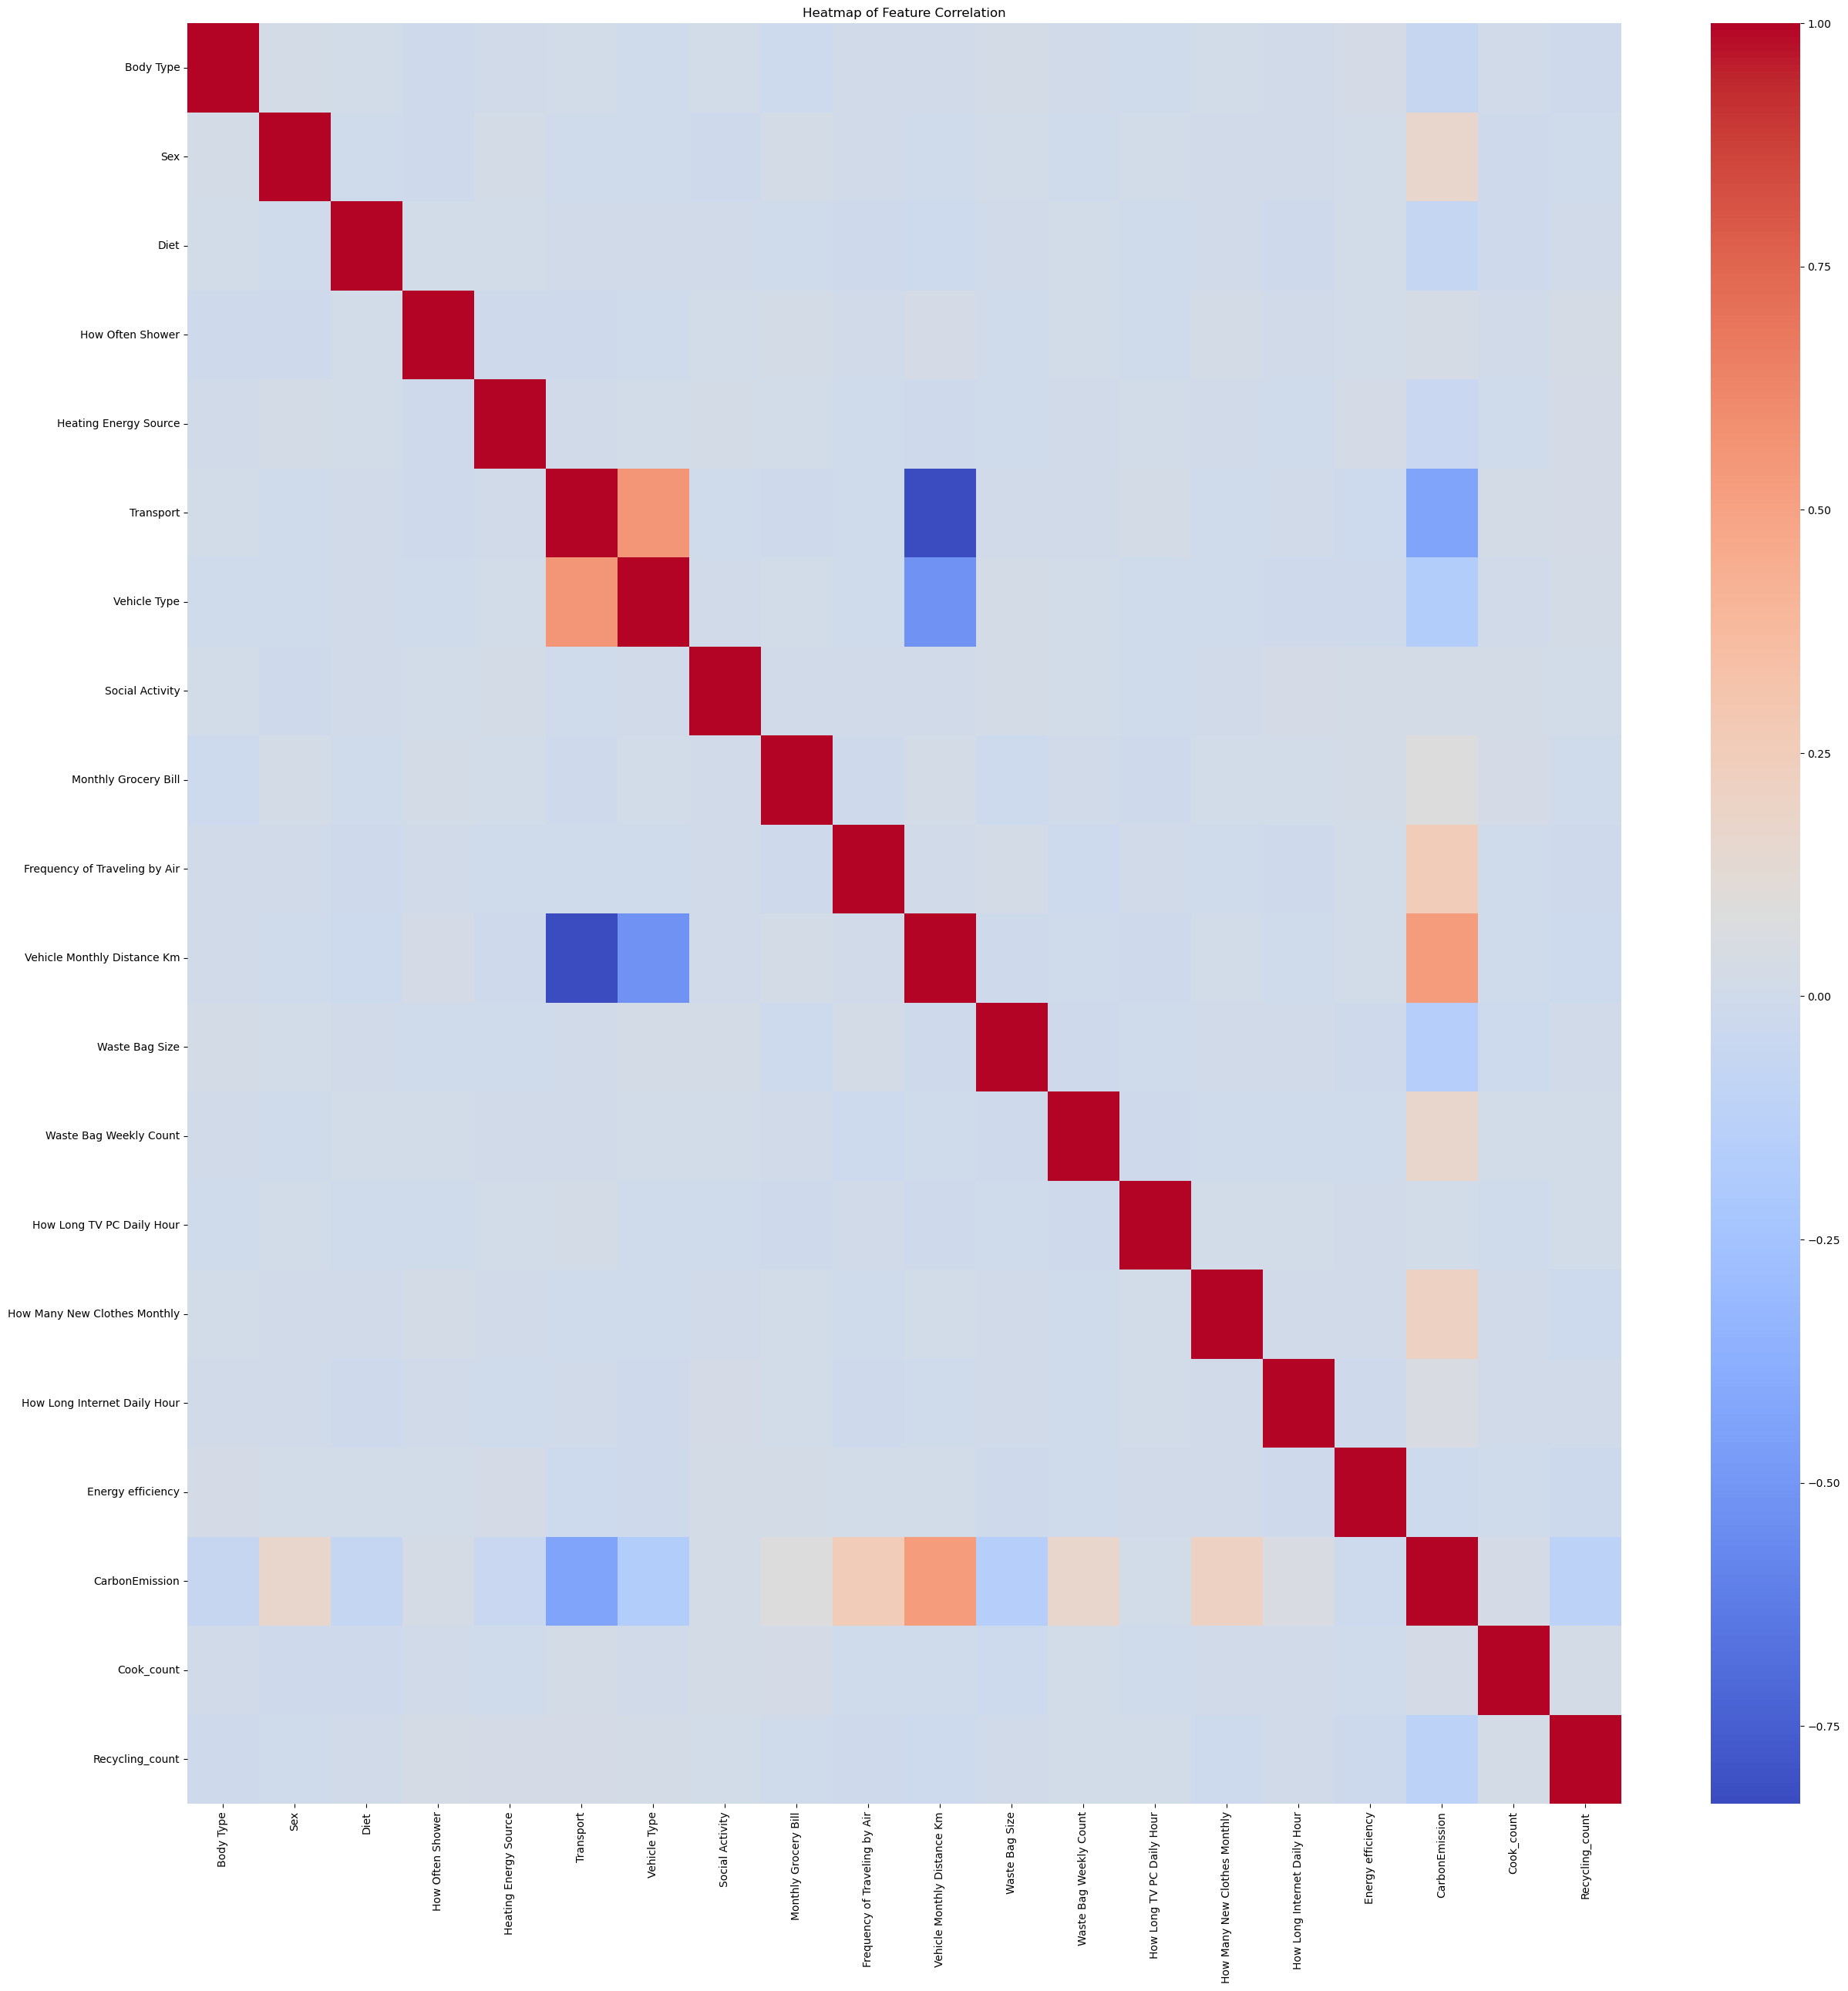

In [30]:



# Calculate correlations
corr = df.corr()

# Create a heatmap
plt.figure(figsize=(30, 30))
sns.heatmap(corr, cmap='coolwarm')

plt.title('Heatmap of Feature Correlation')
plt.show()

In [31]:
df.describe()
# amost mean is min + max by 2 thus good data distibution
# except vehcile type as 0 fo rmany  and air freq vehcule monthly -> thus carbonemison is nto eman , cook count and recycle a

,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Vehicle Type,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,Energy efficiency,CarbonEmission,Cook_count,Recycling_count
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,1.509400,0.499300,1.491900,1.493700,1.486500,1.014800,3.41650,0.98690,123.875200,1.503300,1119.424700,1.502400,3.024600,12.139200,25.109000,11.889100,1.009500,1465.330000,1.57510,1.067500
std,1.119213,0.500025,1.113489,1.123604,1.116755,0.818809,1.28452,0.81731,72.234018,1.123795,1197.077133,1.120321,1.990375,7.106369,14.698725,7.277218,0.808502,833.625875,1.22111,0.901124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.00000,0.00000,61.000000,0.000000,69.000000,0.750000,1.000000,6.000000,13.000000,6.000000,0.000000,812.000000,1.00000,0.000000
50%,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,4.00000,1.00000,123.000000,2.000000,708.500000,1.000000,3.000000,12.000000,25.000000,12.000000,1.000000,1348.000000,2.00000,1.000000
75%,3.000000,1.000000,2.000000,3.000000,2.000000,2.000000,4.00000,2.00000,187.000000,3.000000,1850.250000,3.000000,5.000000,18.000000,38.000000,18.000000,2.000000,2019.000000,3.00000,2.000000
max,3.000000,1.000000,3.000000,3.000000,3.000000,2.000000,5.00000,2.00000,249.000000,3.000000,4002.000000,3.000000,6.000000,24.000000,50.000000,24.000000,2.000000,3508.000000,4.00000,3.000000


In [41]:
df.corr()['CarbonEmission']  
# thus remvove how often shower ,social activity(diffcilut otjudege) , how long pc , how long intenrt , neergy effieicent, cook count in linear models

Body Type                       -0.063007
Sex                              0.164158
Diet                            -0.066384
How Often Shower                 0.028011
Heating Energy Source           -0.046774
Transport                       -0.432684
Vehicle Type                    -0.169594
Social Activity                  0.019798
Monthly Grocery Bill             0.087433
Frequency of Traveling by Air    0.259045
Vehicle Monthly Distance Km      0.534153
Waste Bag Size                  -0.152407
Waste Bag Weekly Count           0.169652
How Long TV PC Daily Hour        0.011311
How Many New Clothes Monthly     0.214488
How Long Internet Daily Hour     0.050386
Energy efficiency               -0.015314
CarbonEmission                   1.000000
Cook_count                       0.023690
Recycling_count                 -0.119650
Name: CarbonEmission, dtype: float64

In [84]:
# # removing column whose correlation with 'Carbon emmision' is very low
# df=df.drop(columns=['How Long TV PC Daily Hour','How Long Internet Daily Hour', 'How Often Shower', 'Social Activity',  'Cook_count', 'Energy efficiency'])

# use this on linear models


In [43]:
df.head()

,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Vehicle Type,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,Energy efficiency,CarbonEmission,Cook_count,Recycling_count
0,2,0,1,0,0,1,4,1,180,0,191,1,3,7,26,1,0,1505,1,0
1,1,0,3,1,2,2,4,1,64,2,9,0,2,9,38,5,0,1162,1,0
2,2,1,0,2,3,0,5,0,88,1,1839,3,0,14,47,6,1,1856,1,0
3,2,1,0,3,3,2,4,2,107,2,74,2,2,20,5,7,1,360,2,3
4,1,0,3,0,0,0,0,1,216,3,3537,1,0,3,5,6,2,3234,0,0


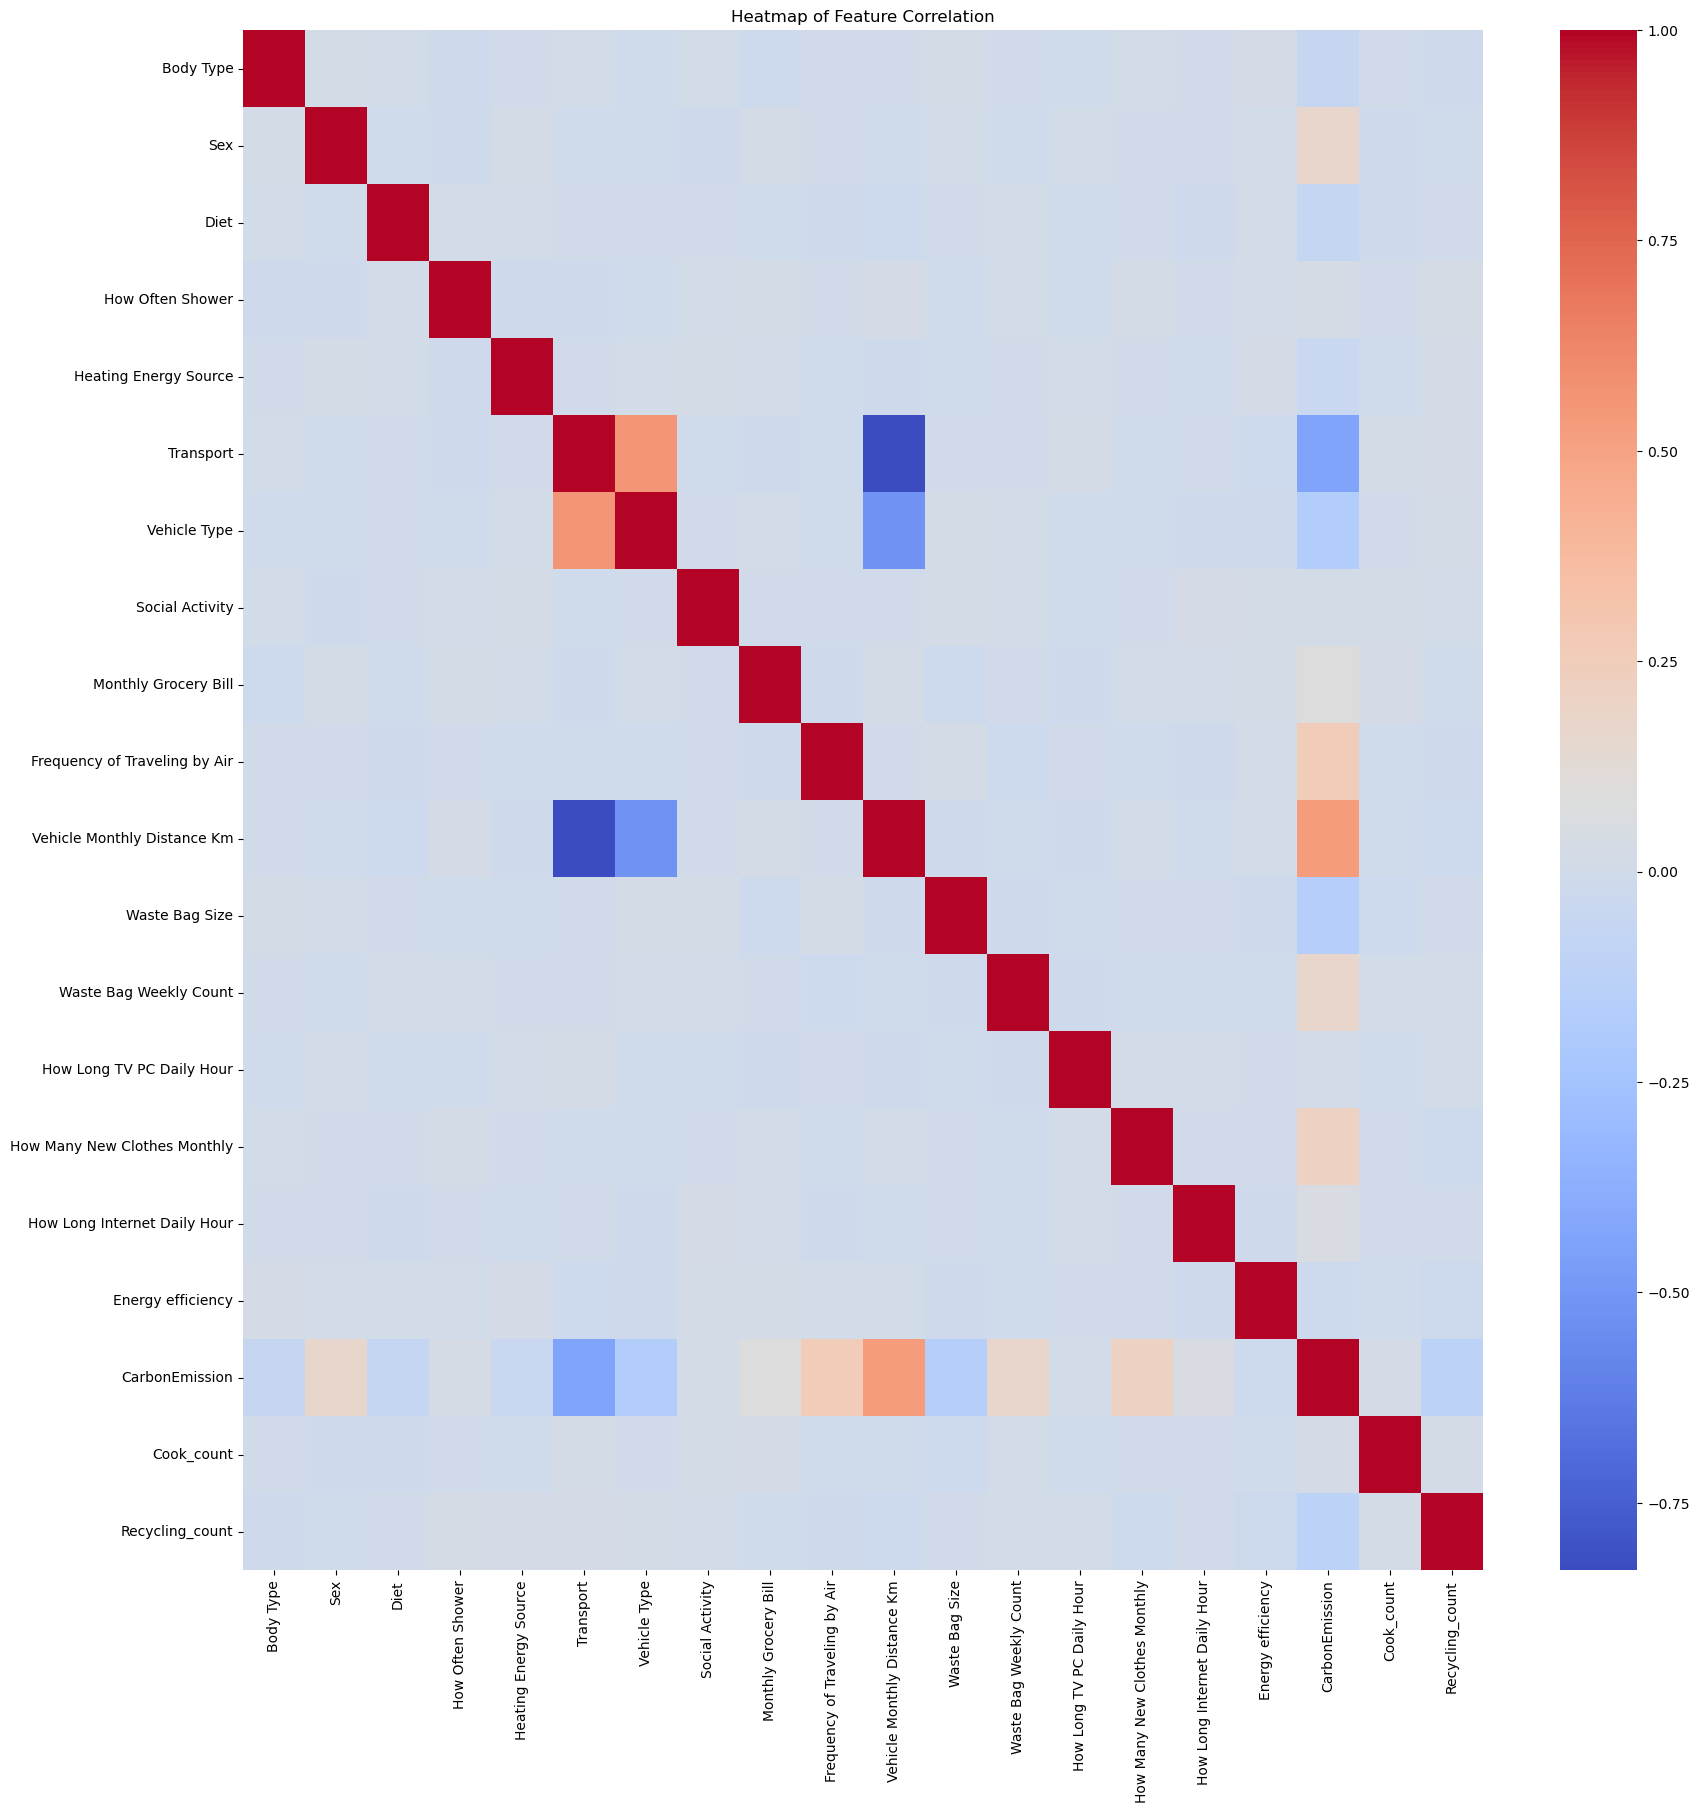

In [44]:
# Calculate correlations
corr = df.corr()

# Create a heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corr, cmap='coolwarm')

plt.title('Heatmap of Feature Correlation')
plt.show()

In [91]:

# normalization
columns_to_encode = ['Monthly Grocery Bill', 'Vehicle Monthly Distance Km', 'Waste Bag Weekly Count',
                     'How Many New Clothes Monthly']  # Add your column names here


# Manually encode categorical columns
for col in columns_to_encode:
   # Find the maximum value in the column
    max_value = df[col].max()
    
    # Divide each value in the column by its maximum value
    df[col] = df[col] / max_value


In [95]:
df.head()

,Monthly Grocery Bill,Vehicle Monthly Distance Km,Waste Bag Weekly Count,How Many New Clothes Monthly,CarbonEmission,Microwave,Airfryer,Oven,Stove,Grill,...,Sex_encoded,Diet_encoded,How Often Shower_encoded,Heating Energy Source_encoded,Transport_encoded,Vehicle Type_encoded,Social Activity_encoded,Frequency of Traveling by Air_encoded,Waste Bag Size_encoded,Energy efficiency_encoded
0,0.769231,0.021002,0.571429,0.52,2238,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0.381271,0.000900,0.428571,0.76,1892,1,0,0,1,0,...,0,1,1,1,1,0,0,1,1,0
2,0.461538,0.247225,0.142857,0.94,2595,1,0,1,0,0,...,1,2,2,2,2,1,1,2,2,1
3,0.525084,0.007401,0.428571,0.10,1074,1,1,0,0,1,...,1,2,3,2,1,0,2,1,3,1
4,0.889632,0.845785,0.142857,0.10,4743,0,0,1,0,0,...,0,1,0,0,2,2,0,3,0,2


In [45]:
# moving CarbonEmission column at last

# Extract the column
column_to_move = df.pop('CarbonEmission')

# Re-insert the column at the last position
df['CarbonEmission'] = column_to_move

In [46]:
df.head()

,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Vehicle Type,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,Energy efficiency,Cook_count,Recycling_count,CarbonEmission
0,2,0,1,0,0,1,4,1,180,0,191,1,3,7,26,1,0,1,0,1505
1,1,0,3,1,2,2,4,1,64,2,9,0,2,9,38,5,0,1,0,1162
2,2,1,0,2,3,0,5,0,88,1,1839,3,0,14,47,6,1,1,0,1856
3,2,1,0,3,3,2,4,2,107,2,74,2,2,20,5,7,1,2,3,360
4,1,0,3,0,0,0,0,1,216,3,3537,1,0,3,5,6,2,0,0,3234
